In [12]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from scipy.integrate import ode 
from kuramoto import * # import the kuramoto classes from file 
from utils import *
from scipy import stats, optimize

## First, we do some 1D simulations.  

In [20]:
# Set up model parameters 
N_samples = 4
epsilon = 1
gamma = -0.44
sigmas = np.array([0.01, 0.1, 0.45, 0.6])
mean_omega = 0


# Set up simulation parameters 
L = 200
T = 1e4 # total time of the simulation 
n_frames = T # number of time points recorded in the end 
grad = 1.3
grads = [-grad, grad]

data = [] 
omegas = [] 
models = [] 


for (i, sigma) in enumerate(sigmas): 
    # Initialise the model and run the simulation 
    init = np.zeros((Ls[i]))
    model = Kuramoto(epsilon, gamma, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(Ls[i], T, n_frames, init=init, seed=None) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas)
    models.append(model)

100%|██████████| 10000/10000 [01:01<00:00, 163.33it/s]


slope:  0.13794827336913895
slope:  0.34209662705355665
slope:  0.6458117047305842
slope:  0.7241297856248906


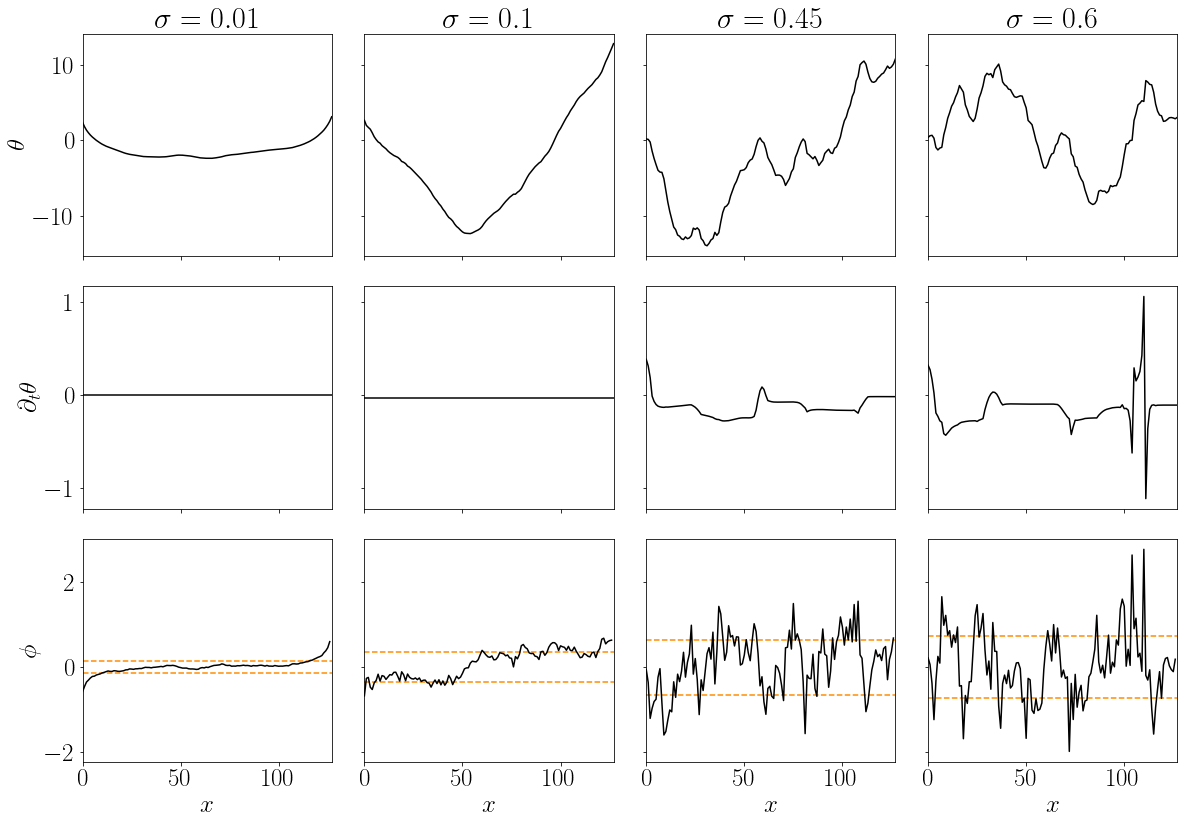

In [21]:
f = 10

plt.rc('text', usetex=True)
plt.rc('font', size=25, family='serif')
fig, axes = plt.subplots(3, len(sigmas[:f]), sharey='row', sharex=True, figsize=(4*len(sigmas[:f])+1, 12))

for (i, sigma) in enumerate(sigmas[:f]):
    axes[0, i].plot(data[i], 'k-')    
    axes[1, i].plot(models[i]._det_rhs(data[i]), 'k-')
    
    v = data[i][1:]-data[i][:-1]
    s = np.sqrt(2*np.mean(1-np.cos(v)))
    axes[2, i].axhline(y=s, color='darkorange', linestyle='--')
    axes[2, i].axhline(y=-s, color='darkorange', linestyle='--')
    axes[2, i].plot(v, 'k-')
    axes[2, i].set_xlabel(r'$x$')
    print('slope: ', s)
    

axes[0, 0].set_ylabel(r'$\theta$')
axes[1, 0].set_ylabel(r'$\partial_t \theta $')
axes[2, 0].set_ylabel(r'$\phi$')
plt.xlim([0, Ls[0]-1])

for i in range(len(sigmas)):
    axes[0, i].set_title(r'$\sigma={}$'.format(sigmas[i]))
plt.savefig('sim.pdf')
plt.tight_layout()
plt.show() 

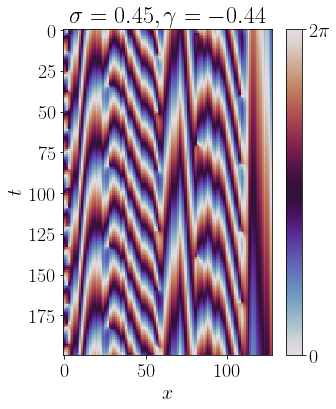

In [23]:
i = 2 

plt.figure(figsize=(5, 6))
plt.rc('font', size=20)
plt.rc('text', usetex=True)
im = plt.imshow(models[i].res[-200:] % (2*np.pi), cmap='twilight', interpolation='None', vmin=0, vmax=2*np.pi)
cbar = plt.colorbar(im)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi$'])
plt.title(r'$\sigma={},\gamma ={}$'.format(sigmas[i], gamma))
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.show() 